# Importing modules and Packages

In [44]:
import pandas as pd
import numpy as np
import json
from textblob import TextBlob

In [4]:
import matplotlib.pyplot as plt

In [5]:
import extract_dataframe



In [6]:
_, tweets_list = extract_dataframe.read_json("Economic_Twitter_Data.json")
tweets_list[:5]

[{'created_at': 'Fri Apr 22 22:20:18 +0000 2022',
  'id': 1517629396575784961,
  'id_str': '1517629396575784961',
  'text': 'RT @nikitheblogger: Irre: Annalena Baerbock sagt, es bricht ihr das Herz, dass man nicht bedingungslos schwere Waffen liefert.\nMir bricht e…',
  'truncated': False,
  'entities': {'hashtags': [],
   'symbols': [],
   'user_mentions': [{'screen_name': 'nikitheblogger',
     'name': 'Neverforgetniki',
     'id': 809188392089092097,
     'id_str': '809188392089092097',
     'indices': [3, 18]}],
   'urls': []},
  'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': None,
  'in_reply_to_user_id_str': None,
  'in_reply_to_screen_name': None,
  'user': {'id': 1487174445248692233,
   'id_str': '1487174445248692233',
   'name': 'MC',
   'screen_name': 'McMc74078966',
   'location': '',
   'description': '',
   'url': None,
   'entit

In [7]:
tweet= extract_dataframe.TweetDfExtractor(tweets_list)
tweet_df = tweet.get_tweet_df(True)

File Successfully Saved.!!!


In [8]:
tweet_df.head()

created_at  \
0  Fri Apr 22 22:20:18 +0000 2022   
1  Fri Apr 22 22:19:16 +0000 2022   
2  Fri Apr 22 22:17:28 +0000 2022   
3  Fri Apr 22 22:17:20 +0000 2022   
4  Fri Apr 22 22:13:15 +0000 2022   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  polarity  subjectivity  \
0  RT @nikitheblogger: Irre: Annalena Baerbock sa...       0.0           0.0   
1  RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...       0.0           0.0   
2  RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...       0.0           0.0   
3  RT @WRi007: Die #Deutschen sind ein braves Vol...       0.0           0.0   
4  RT @RolandTichy: Baerbock verkündet mal so neb...       0.0           0.0   

  lang  favorite_count  retweet_count original_author  followers_count  \
0   de            2356            355    McMc74078966                3   
1   de            1985            505    McMc74078966                3   
2   de              16              4    McMc74078966                3   
3   de            1242            332    McMc74078966                3   
4   de            1329            386    McMc74078966                3   

   friends_count possibly_sensitive  \
0             12               None   
1             12               None   
2             12               None   
3             12               None   
4             12               None   

                                            hashtags       user_mentions place  
0                                                 []      nikitheblogger        
1                                                 []            sagt_mit        
2                                                 []  Kryptonoun, WRi007        
3  [{'text': 'Deutschen', 'indices': [16, 26]}, {...              WRi007        
4                                                 []         RolandTichy

## Data preprocessing 

In [9]:
from clean_tweets_dataframe import Clean_Tweets

In [10]:
df_cleaner= Clean_Tweets(tweet_df)

Automation in Action...!!!


# Data Cleaning 

## Drop unwanted columns

In [12]:
df= df_cleaner.drop_unwanted_column(df_cleaner.df)
df.head()

created_at  \
0  Fri Apr 22 22:20:18 +0000 2022   
1  Fri Apr 22 22:19:16 +0000 2022   
2  Fri Apr 22 22:17:28 +0000 2022   
3  Fri Apr 22 22:17:20 +0000 2022   
4  Fri Apr 22 22:13:15 +0000 2022   

                                              source  \
0  <a href="http://twitter.com/download/android" ...   
1  <a href="http://twitter.com/download/android" ...   
2  <a href="http://twitter.com/download/android" ...   
3  <a href="http://twitter.com/download/android" ...   
4  <a href="http://twitter.com/download/android" ...   

                                       original_text  polarity  subjectivity  \
0  RT @nikitheblogger: Irre: Annalena Baerbock sa...       0.0           0.0   
1  RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...       0.0           0.0   
2  RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...       0.0           0.0   
3  RT @WRi007: Die #Deutschen sind ein braves Vol...       0.0           0.0   
4  RT @RolandTichy: Baerbock verkündet mal so neb...       0.0           0.0   

  lang  favorite_count  retweet_count original_author  followers_count  \
0   de            2356            355    McMc74078966                3   
1   de            1985            505    McMc74078966                3   
2   de              16              4    McMc74078966                3   
3   de            1242            332    McMc74078966                3   
4   de            1329            386    McMc74078966                3   

   friends_count possibly_sensitive  \
0             12               None   
1             12               None   
2             12               None   
3             12               None   
4             12               None   

                                            hashtags       user_mentions place  
0                                                 []      nikitheblogger        
1                                                 []            sagt_mit        
2                                                 []  Kryptonoun, WRi007        
3  [{'text': 'Deutschen', 'indices': [16, 26]}, {...              WRi007        
4                                                 []         RolandTichy

## Drop duplicates

In [13]:
df = df_cleaner.drop_duplicate(df)

## Convert columns in the dataframe to the correct data types

In [14]:
df= df_cleaner.convert_to_datetime(df)

In [15]:
df =df_cleaner.convert_to_numbers(df)
df.head()

created_at                                             source  \
0 2022-04-22 22:20:18  <a href="http://twitter.com/download/android" ...   
1 2022-04-22 22:19:16  <a href="http://twitter.com/download/android" ...   
2 2022-04-22 22:17:28  <a href="http://twitter.com/download/android" ...   
3 2022-04-22 22:17:20  <a href="http://twitter.com/download/android" ...   
4 2022-04-22 22:13:15  <a href="http://twitter.com/download/android" ...   

                                       original_text  polarity  subjectivity  \
0  RT @nikitheblogger: Irre: Annalena Baerbock sa...       0.0           0.0   
1  RT @sagt_mit: Merkel schaffte es in 1 Jahr 1 M...       0.0           0.0   
2  RT @Kryptonoun: @WRi007 Pharma in Lebensmittel...       0.0           0.0   
3  RT @WRi007: Die #Deutschen sind ein braves Vol...       0.0           0.0   
4  RT @RolandTichy: Baerbock verkündet mal so neb...       0.0           0.0   

  lang  favorite_count  retweet_count original_author  followers_count  \
0   de            2356            355    McMc74078966                3   
1   de            1985            505    McMc74078966                3   
2   de              16              4    McMc74078966                3   
3   de            1242            332    McMc74078966                3   
4   de            1329            386    McMc74078966                3   

   friends_count possibly_sensitive  \
0             12               None   
1             12               None   
2             12               None   
3             12               None   
4             12               None   

                                            hashtags       user_mentions place  
0                                                 []      nikitheblogger        
1                                                 []            sagt_mit        
2                                                 []  Kryptonoun, WRi007        
3  [{'text': 'Deutschen', 'indices': [16, 26]}, {...              WRi007        
4                                                 []         RolandTichy

In [16]:
df =df_cleaner.remove_non_english_tweets(df)

In [17]:
df.info

<bound method DataFrame.info of                created_at                                             source  \
38    2022-04-22 22:17:05  <a href="http://twitter.com/download/android" ...   
39    2022-04-22 13:44:53  <a href="http://twitter.com/download/android" ...   
41    2022-04-22 06:10:34  <a href="http://twitter.com/download/android" ...   
42    2022-04-21 17:22:09  <a href="http://twitter.com/download/android" ...   
43    2022-04-21 10:32:26  <a href="http://twitter.com/download/android" ...   
...                   ...                                                ...   
24584 2022-04-22 15:22:56  <a href="http://twitter.com/download/iphone" r...   
24586 2022-04-22 15:22:29  <a href="http://twitter.com/download/iphone" r...   
24596 2022-04-22 15:01:27  <a href="http://twitter.com/download/iphone" r...   
24599 2022-04-22 14:58:12  <a href="http://twitter.com/download/iphone" r...   
24622 2022-04-22 14:44:35  <a href="http://twitter.com/download/iphone" r...   

       

In [18]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of        created_at  source  original_text  polarity  subjectivity   lang  \
38          False   False          False     False         False  False   
39          False   False          False     False         False  False   
41          False   False          False     False         False  False   
42          False   False          False     False         False  False   
43          False   False          False     False         False  False   
...           ...     ...            ...       ...           ...    ...   
24584       False   False          False     False         False  False   
24586       False   False          False     False         False  False   
24596       False   False          False     False         False  False   
24599       False   False          False     False         False  False   
24622       False   False          False     False         False  False   

       favorite_count  retweet_count 

In [19]:
df.count()

created_at            16374
source                16374
original_text         16374
polarity              16374
subjectivity          16374
lang                  16374
favorite_count        16374
retweet_count         16374
original_author       16374
followers_count       16374
friends_count         16374
possibly_sensitive     6168
hashtags              16374
user_mentions         16374
place                 16374
dtype: int64

# Sentiment Analysis

In [20]:
# Categorizes tweets based on their polarity
def PolarityCategories(polarity_text):
    if (polarity_text> 0.5):
        return "positive"
    
    elif (polarity_text< 0.5):
        return "negative"
    
    elif (polarity_text==0.5):
        return "neutral"

In [21]:
df ["polarity_categories"]= df["polarity"].apply(PolarityCategories)
df.head()

created_at                                             source  \
38 2022-04-22 22:17:05  <a href="http://twitter.com/download/android" ...   
39 2022-04-22 13:44:53  <a href="http://twitter.com/download/android" ...   
41 2022-04-22 06:10:34  <a href="http://twitter.com/download/android" ...   
42 2022-04-21 17:22:09  <a href="http://twitter.com/download/android" ...   
43 2022-04-21 10:32:26  <a href="http://twitter.com/download/android" ...   

                                        original_text  polarity  subjectivity  \
38  RT @NorthstarCharts: The 10-year yield is tell...      0.16      0.540000   
39  RT @MichaelAArouet: German 10y mortgage rate w...      0.15      0.175000   
41        RT @goldseek: When? https://t.co/kO2FfHKaZg      0.00      0.000000   
42  RT @charliebilello: The 30-year mortgage rate ...      0.00      0.183333   
43  RT @biancoresearch: Rates rise until something...     -0.40      0.400000   

   lang  favorite_count  retweet_count  original_author  followers_count  \
38   en             188             43  davideiacovozzi               18   
39   en             179             32  davideiacovozzi               18   
41   en             193             26  davideiacovozzi               18   
42   en             620            213  davideiacovozzi               18   
43   en            1787            417  davideiacovozzi               18   

    friends_count possibly_sensitive  \
38             55               None   
39             55               None   
41             55              False   
42             55               None   
43             55              False   

                                             hashtags    user_mentions place  \
38  [{'text': 'gold', 'indices': [116, 121]}, {'te...  NorthstarCharts         
39                                                 []   MichaelAArouet         
41                                                 []         goldseek         
42                                                 []   charliebilello         
43                                                 []   biancoresearch         

   polarity_categories  
38            negative  
39            negative  
41            negative  
42            negative  
43            negative

Text(0, 0.5, '')

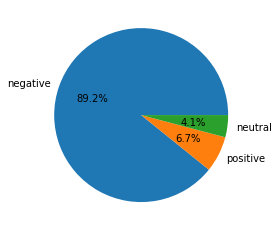

In [22]:
df['polarity_categories'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

In [23]:
## Categorizes tweets based on their subjectivity
def SubjectivityCategories(subjective_text):
    if (subjective_text> 0.5):
        return "subjective"
    
    elif (subjective_text< 0.5):
        return "objective"
    
    elif (subjective_text==0.5):
        return "neutral"

In [24]:
df ["subjectivity_categories"]= df["subjectivity"].apply(SubjectivityCategories)
df.head()

created_at                                             source  \
38 2022-04-22 22:17:05  <a href="http://twitter.com/download/android" ...   
39 2022-04-22 13:44:53  <a href="http://twitter.com/download/android" ...   
41 2022-04-22 06:10:34  <a href="http://twitter.com/download/android" ...   
42 2022-04-21 17:22:09  <a href="http://twitter.com/download/android" ...   
43 2022-04-21 10:32:26  <a href="http://twitter.com/download/android" ...   

                                        original_text  polarity  subjectivity  \
38  RT @NorthstarCharts: The 10-year yield is tell...      0.16      0.540000   
39  RT @MichaelAArouet: German 10y mortgage rate w...      0.15      0.175000   
41        RT @goldseek: When? https://t.co/kO2FfHKaZg      0.00      0.000000   
42  RT @charliebilello: The 30-year mortgage rate ...      0.00      0.183333   
43  RT @biancoresearch: Rates rise until something...     -0.40      0.400000   

   lang  favorite_count  retweet_count  original_author  followers_count  \
38   en             188             43  davideiacovozzi               18   
39   en             179             32  davideiacovozzi               18   
41   en             193             26  davideiacovozzi               18   
42   en             620            213  davideiacovozzi               18   
43   en            1787            417  davideiacovozzi               18   

    friends_count possibly_sensitive  \
38             55               None   
39             55               None   
41             55              False   
42             55               None   
43             55              False   

                                             hashtags    user_mentions place  \
38  [{'text': 'gold', 'indices': [116, 121]}, {'te...  NorthstarCharts         
39                                                 []   MichaelAArouet         
41                                                 []         goldseek         
42                                                 []   charliebilello         
43                                                 []   biancoresearch         

   polarity_categories subjectivity_categories  
38            negative              subjective  
39            negative               objective  
41            negative               objective  
42            negative               objective  
43            negative               objective

Text(0, 0.5, '')

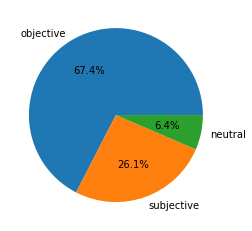

In [25]:
df['subjectivity_categories'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')

## Extracting text information 

In [65]:
import re
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
import string

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Stella\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stella\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
text_list = df['original_text']
text_list.head()

38    RT @NorthstarCharts: The 10-year yield is tell...
39    RT @MichaelAArouet: German 10y mortgage rate w...
41          RT @goldseek: When? https://t.co/kO2FfHKaZg
42    RT @charliebilello: The 30-year mortgage rate ...
43    RT @biancoresearch: Rates rise until something...
Name: original_text, dtype: object

In [32]:
text_df = pd.DataFrame(text_list)
text_df.head()

original_text
38  RT @NorthstarCharts: The 10-year yield is tell...
39  RT @MichaelAArouet: German 10y mortgage rate w...
41        RT @goldseek: When? https://t.co/kO2FfHKaZg
42  RT @charliebilello: The 30-year mortgage rate ...
43  RT @biancoresearch: Rates rise until something...

In [34]:
#Cleaning Text (RT, Punctuation etc)
#Creating new dataframe and new features
text_df["text"] = text_df.iloc[:, 0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
text_df["text"] = text_df.text.map(remove_rt).map(rt)
text_df["text"] = text_df.text.str.lower()
text_df.head(10)

original_text  \
38  RT @NorthstarCharts: The 10-year yield is tell...   
39  RT @MichaelAArouet: German 10y mortgage rate w...   
41        RT @goldseek: When? https://t.co/kO2FfHKaZg   
42  RT @charliebilello: The 30-year mortgage rate ...   
43  RT @biancoresearch: Rates rise until something...   
44  RT @LanceRoberts: Buying opportunities like th...   
45  RT @MacroAlf: Welcome to September 2018.\n\nBo...   
46  RT @BotBenFranklin: The horse thinks one thing...   
47  RT @Galactic_Trader: Global growth optimism at...   
48  RT @AndreasSteno: This is the most important c...   

                                                 text  
38   the 10 year yield is telling us that there s ...  
39   german 10y mortgage rate went from 0 8  to 2 ...  
41                                            when     
42   the 30 year mortgage rate in the us rises to ...  
43   rates rise until something breaks   is anythi...  
44   buying opportunities like this only occur eve...  
45   welcome to september 2018   bond markets test...  
46   the horse thinks one thing  and he that saddl...  
47   global growth optimism at all time lows    we...  
48   this is the most important chart in the world...

In [35]:
#Calculating Negative, Positive, Neutral and Compound values

text_df[['polarity', 'subjectivity']] = text_df['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in text_df['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        text_df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        text_df.loc[index, 'sentiment'] = "positive"
    else:
        text_df.loc[index, 'sentiment'] = "neutral"
    text_df.loc[index, 'negative'] = neg
    text_df.loc[index, 'neutral'] = neu
    text_df.loc[index, 'positive'] = pos
    text_df.loc[index, 'compound'] = comp

text_df.head(10)

original_text  \
38  RT @NorthstarCharts: The 10-year yield is tell...   
39  RT @MichaelAArouet: German 10y mortgage rate w...   
41        RT @goldseek: When? https://t.co/kO2FfHKaZg   
42  RT @charliebilello: The 30-year mortgage rate ...   
43  RT @biancoresearch: Rates rise until something...   
44  RT @LanceRoberts: Buying opportunities like th...   
45  RT @MacroAlf: Welcome to September 2018.\n\nBo...   
46  RT @BotBenFranklin: The horse thinks one thing...   
47  RT @Galactic_Trader: Global growth optimism at...   
48  RT @AndreasSteno: This is the most important c...   

                                                 text  polarity  subjectivity  \
38   the 10 year yield is telling us that there s ...  0.160000      0.540000   
39   german 10y mortgage rate went from 0 8  to 2 ...  0.150000      0.175000   
41                                            when     0.000000      0.000000   
42   the 30 year mortgage rate in the us rises to ...  0.000000      0.183333   
43   rates rise until something breaks   is anythi... -0.400000      0.400000   
44   buying opportunities like this only occur eve... -0.100000      0.550000   
45   welcome to september 2018   bond markets test...  0.400000      0.637500   
46   the horse thinks one thing  and he that saddl...  0.000000      0.000000   
47   global growth optimism at all time lows    we...  0.250000      0.250000   
48   this is the most important chart in the world...  0.366667      0.566667   

   sentiment  negative  neutral  positive  compound  
38  negative     0.100    0.900     0.000   -0.2732  
39   neutral     0.000    1.000     0.000    0.0000  
41   neutral     0.000    1.000     0.000    0.0000  
42  negative     0.080    0.920     0.000   -0.2732  
43  negative     0.279    0.721     0.000   -0.4767  
44  positive     0.000    0.611     0.389    0.6249  
45  positive     0.088    0.714     0.197    0.3818  
46   neutral     0.000    1.000     0.000    0.0000  
47  positive     0.079    0.655     0.266    0.6486  
48  negative     0.130    0.779     0.091    0.0240

In [37]:
#Creating new data frames for all sentiments (positive, negative and neutral)
text_df_negative = text_df[text_df["sentiment"]== "negative"]
text_df_positive = text_df[text_df ["sentiment"]=="positive"]
text_df_neutral = text_df[text_df["sentiment"]== "neutral"]

In [38]:
text_df_positive.head()

original_text  \
44  RT @LanceRoberts: Buying opportunities like th...   
45  RT @MacroAlf: Welcome to September 2018.\n\nBo...   
47  RT @Galactic_Trader: Global growth optimism at...   
50  RT @AndreasSteno: The most important chart in ...   
52  RT @Schuldensuehner: ECB's Lagarde: #ECB will ...   

                                                 text  polarity  subjectivity  \
44   buying opportunities like this only occur eve... -0.100000      0.550000   
45   welcome to september 2018   bond markets test...  0.400000      0.637500   
47   global growth optimism at all time lows    we...  0.250000      0.250000   
50   the most important chart in global macro righ...  0.296429      0.508929   
52   ecb s lagarde   ecb will complete asset purch...  0.175000      0.366667   

   sentiment  negative  neutral  positive  compound  
44  positive     0.000    0.611     0.389    0.6249  
45  positive     0.088    0.714     0.197    0.3818  
47  positive     0.079    0.655     0.266    0.6486  
50  positive     0.000    0.840     0.160    0.2716  
52  positive     0.000    0.872     0.128    0.3612

In [40]:
#Function for count_values_in single columns

def columnValueCount(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [41]:
#Count_values for sentiment
columnValueCount(text_df,"sentiment")

Total  Percentage
positive   7003       42.77
neutral    5229       31.93
negative   4142       25.30

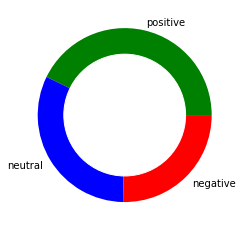

In [45]:
# create data for Pie Chart
pichart = columnValueCount(text_df,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [57]:
#Function to Create Wordcloud
#download the cloud image and store in the same project folder

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("cloud.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

Word Cloud Saved Successfully


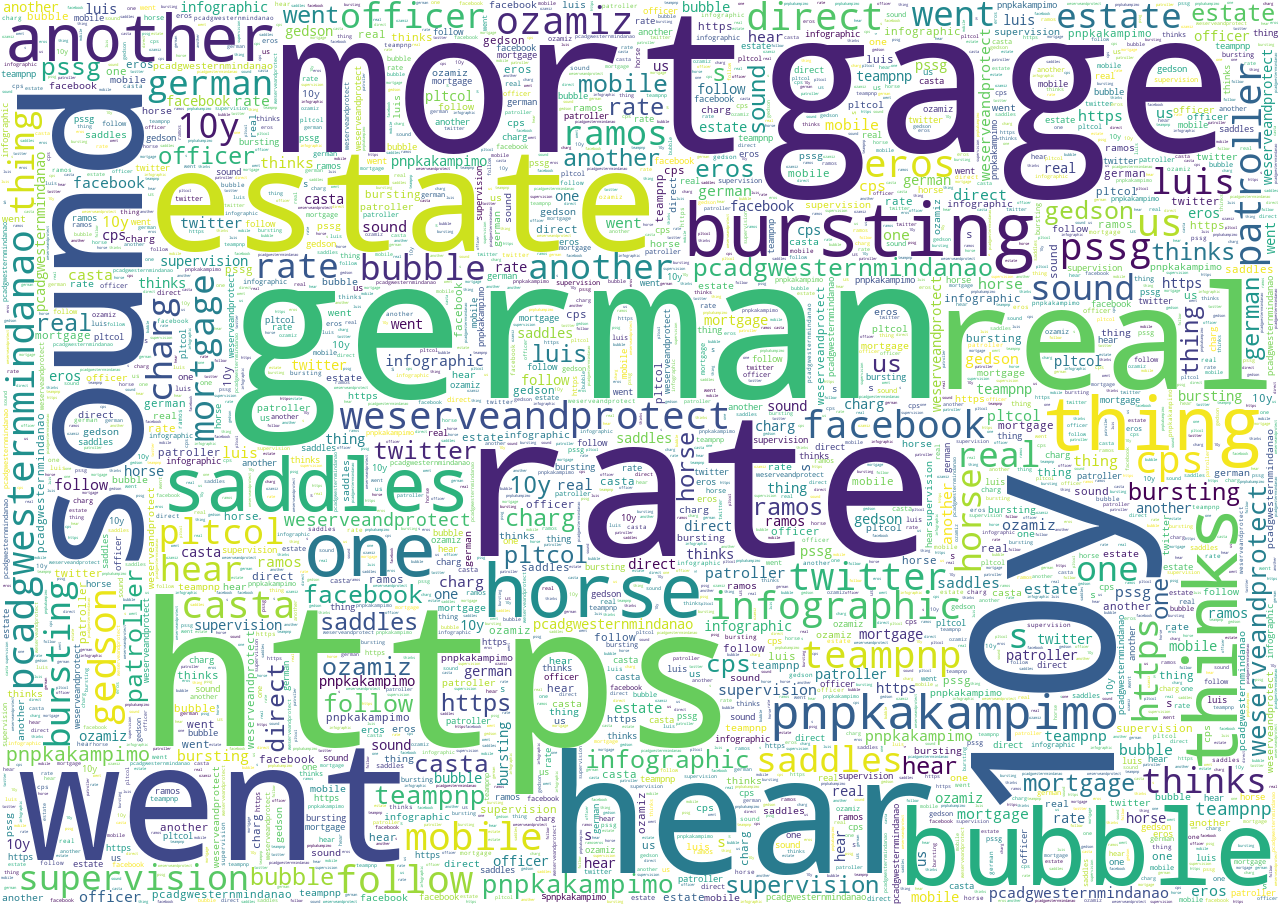

In [58]:
#Creating wordcloud for all tweets
create_wordcloud(text_df["text"].values)

Word Cloud Saved Successfully


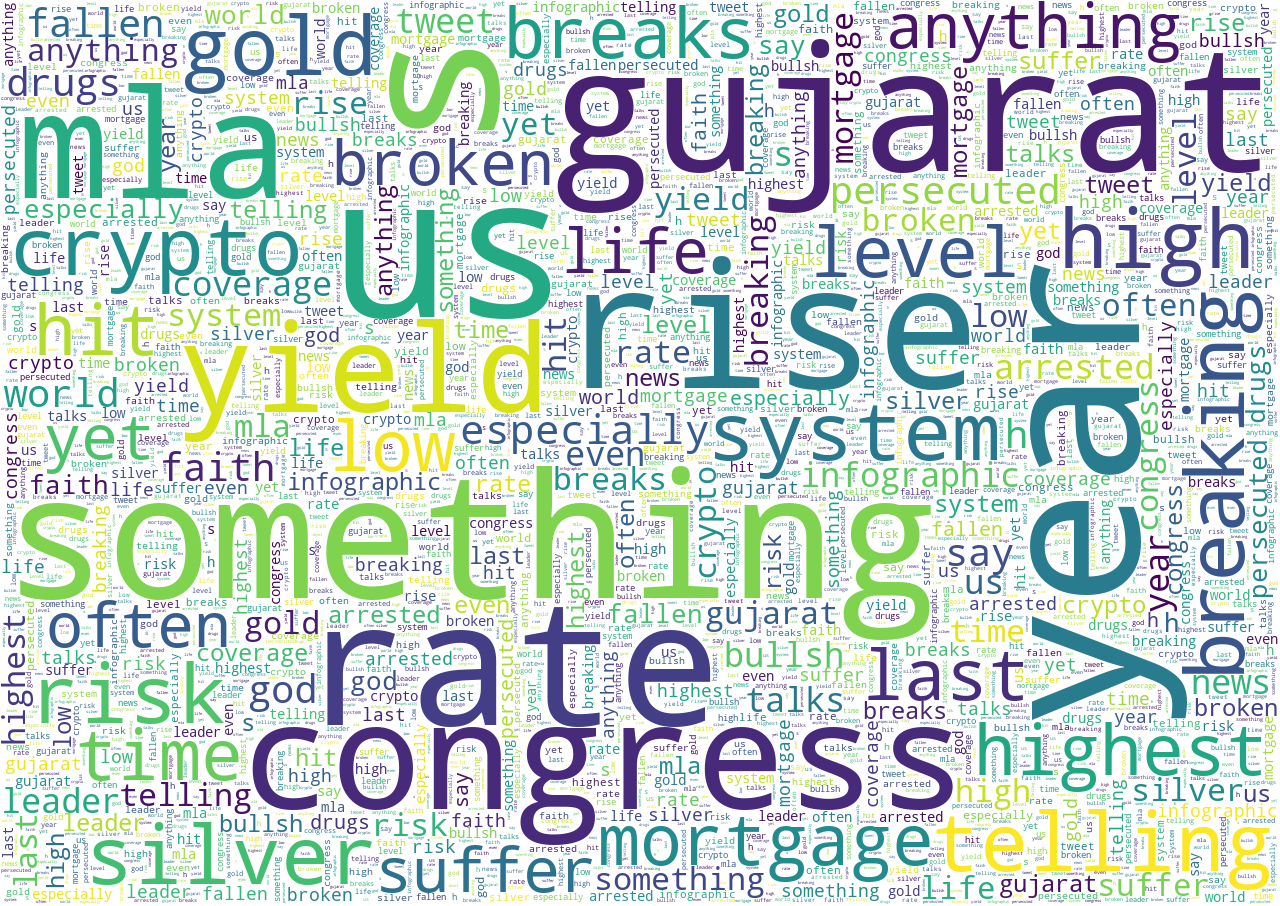

In [54]:
#Creating wordcloud for negative sentiment
create_wordcloud(text_df_negative["text"].values)

Word Cloud Saved Successfully


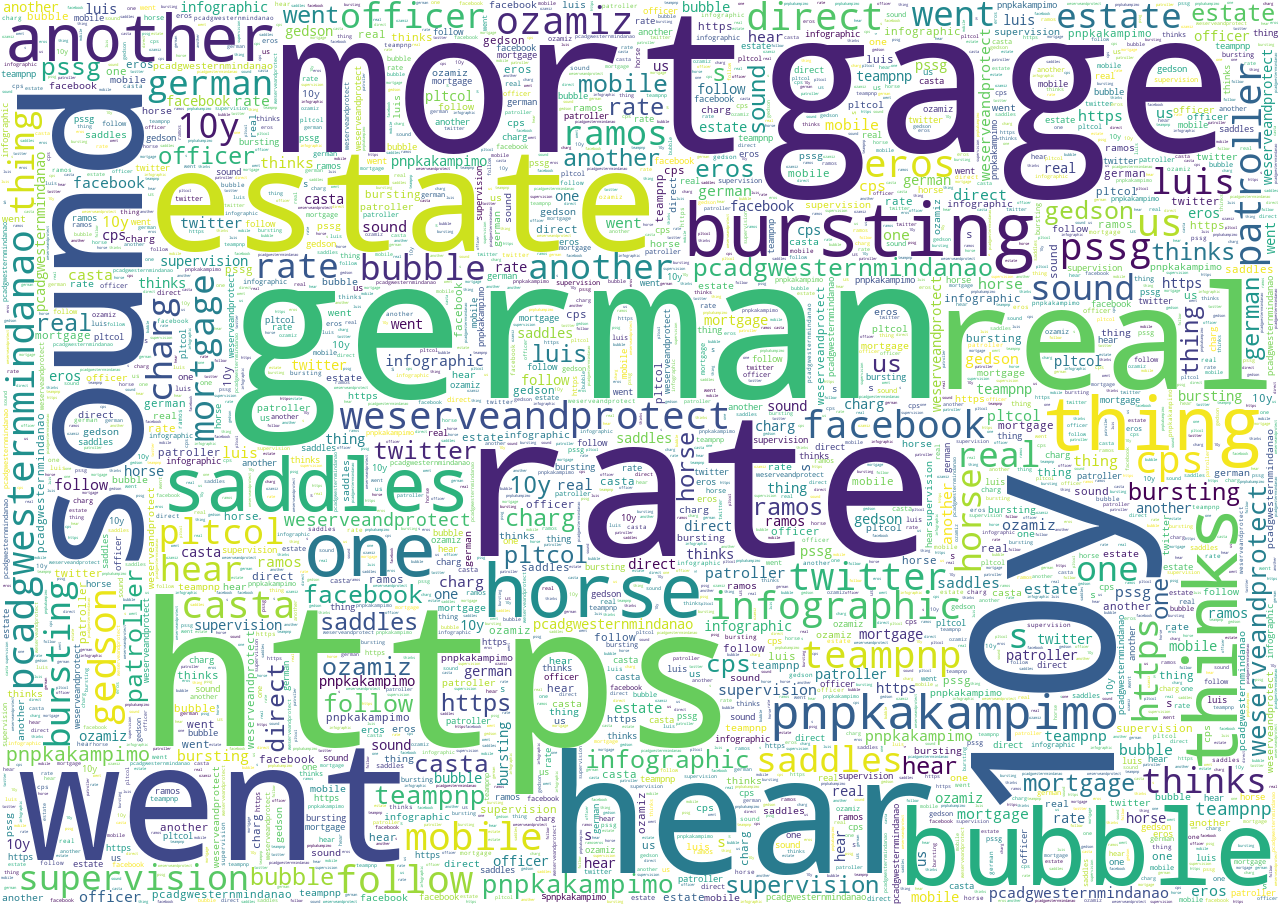

In [55]:
#Creating wordcloud for neutral sentiment
create_wordcloud(text_df_neutral["text"].values)

In [59]:
#Calculating tweet's length and word count
text_df['text_len'] = text_df['text'].astype(str).apply(len)
text_df['word_count'] = text_df['text'].apply(lambda x: len(str(x).split()))


In [60]:
round(pd.DataFrame(text_df.groupby("sentiment").text_len.mean()),2)

text_len
sentiment          
negative     101.42
neutral       82.62
positive      97.58

In [61]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

text_df['punct'] = text_df['text'].apply(lambda x: remove_punct(x))

In [62]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

text_df['tokenized'] = text_df['punct'].apply(lambda x: tokenization(x.lower()))

In [66]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
text_df['nonstop'] = text_df['tokenized'].apply(lambda x: remove_stopwords(x))

In [67]:
#Applying Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

text_df['stemmed'] = text_df['nonstop'].apply(lambda x: stemming(x))

In [68]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [69]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(text_df['text'])
print('{} tweets have {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

16374 tweets have 16960 words


In [70]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

aa  aaa  aaaww  aab  aabideen  aadmi  aag  aah  aaj  ...  zubair  \
0  2   0    0      0    0         0      0    0    0    0  ...       0   
1  2   0    0      0    0         0      0    0    0    0  ...       0   
2  2   0    0      0    0         0      0    0    0    0  ...       0   
3  2   0    0      0    0         0      0    0    0    0  ...       0   
4  2   0    0      0    0         0      0    0    0    0  ...       0   

   zubairpara  zuck  zuckerberg  zulu  zuma  zureik  zwc  zweig  \
0           0     0           0     0     0       0    0      0   
1           0     0           0     0     0       0    0      0   
2           0     0           0     0     0       0    0      0   
3           0     0           0     0     0       0    0      0   
4           0     0           0     0     0       0    0      0   

   zzbhagkqabpvuafimk  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 16960 columns]

In [71]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

0
amp     848
get     659
marvin  643
peopl   607
day     595
go      577
like    571
year    563
one     537
time    533

In [72]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [73]:
#n2_bigram
n2_bigrams = get_top_n_gram(text_df['text'],(2,2),20)

n2_bigrams

[('ni tel', 73),
 ('fuel prices', 69),
 ('new india', 65),
 ('covid 19', 58),
 ('lka srilanka', 58),
 ('marjorie taylor', 56),
 ('9p diesel', 56),
 ('elon musk', 55),
 ('taylor greene', 55),
 ('marvin inu', 55),
 ('hon ble', 54),
 ('marvin marvin', 52),
 ('inflation economy', 51),
 ('sri lanka', 51),
 ('prices avg', 50),
 ('economy biden', 48),
 ('supply chain', 46),
 ('dollar gold', 46),
 ('biden dollar', 46),
 ('courtesy ig', 46)]

In [74]:
#n3_trigram
n3_trigrams = get_top_n_gram(text_df['text'],(3,3),20)

n3_trigrams

[('marjorie taylor greene', 50),
 ('inflation economy biden', 48),
 ('economy biden dollar', 46),
 ('courtesy ig page', 46),
 ('biden dollar gold', 45),
 ('download mehangai daily', 44),
 ('mehangai daily updates', 44),
 ('daily updates city', 44),
 ('updates city fuel', 44),
 ('city fuel prices', 44),
 ('fuel prices download', 44),
 ('prices download android', 44),
 ('download android app', 44),
 ('crypto whale transfer', 42),
 ('whale transfer alert', 42),
 ('unity main strength', 41),
 ('news item courtesy', 41),
 ('main strength united', 40),
 ('strength united india', 40),
 ('united india dream', 40)]

# Training the model